In [1]:
from ema_workbench import Scenario, Policy, MultiprocessingEvaluator, ema_logging, load_results
from ema_workbench.analysis import prim
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.evaluators import BaseEvaluator
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ema_workbench.analysis import parcoords
import seaborn as sns
import funs_project as fp

# Optimisation

In [2]:
ACTORNAME = "Gorssel"

In [3]:
dike_model, planning_steps = get_model_for_problem_formulation(ACTORNAME)
outcomekeys = [outcome.name for outcome in dike_model.outcomes]

## Reading
The results from the optimization. The policies that are selected with the cure_policy_selection.

In [4]:
cases = fp.the_cases(ACTORNAME)

In [5]:
policies = fp.crude_policy_selection(ACTORNAME, 6)

In [6]:
policies = policies.sort_values(by="scenario")
policies

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,scenario
5,0,0,0,1,1,1,2,3,0,0,6,1,4,0.000000e+00,0.000000,8.453408e+06,3
17,0,0,0,1,1,1,2,5,0,0,3,4,1,7.963552e+06,0.000600,1.106922e+07,4
16,0,0,0,1,1,1,2,4,0,0,3,6,5,1.363324e+07,0.000984,9.695982e+06,4
14,0,0,0,1,1,1,3,3,0,0,5,1,5,4.956868e+07,0.002640,8.457116e+06,4
12,0,0,0,1,1,1,3,1,0,0,9,6,4,9.451100e+07,0.004658,6.328075e+06,4
9,0,0,0,1,0,1,1,8,0,0,10,4,1,0.000000e+00,0.000000,1.610892e+07,4
13,0,0,0,1,1,1,0,7,0,0,10,4,1,8.184661e+05,0.000448,1.426165e+07,4
22,0,0,0,1,1,1,3,8,0,0,2,5,3,0.000000e+00,0.000000,1.610892e+07,5
23,0,0,0,1,1,1,2,4,0,0,3,6,3,1.791298e+07,0.000978,9.695980e+06,5
19,0,0,0,1,1,1,2,5,0,0,7,7,3,1.046604e+07,0.000596,1.106922e+07,5


In [7]:
#policies.iloc[:, 0:13]

#### Below we plot per scenario 

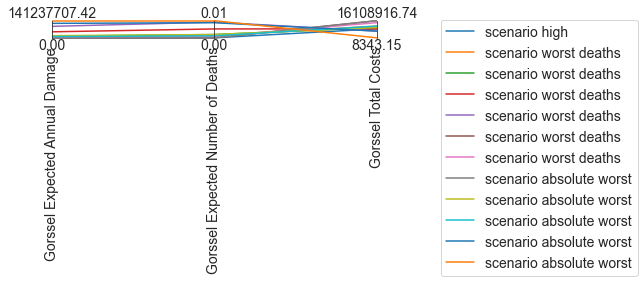

In [8]:
colors = iter(sns.color_palette(n_colors = 12))
limits = parcoords.get_limits(policies.iloc[:, 13:16])

# limits.loc[0, ['inertia', 'reliability']] = 1
# limits.loc[0, 'max_P'] = 4 # max over results based on quick inspection not shown here
# limits.loc[0, 'utility'] = 1 # max over results based on quick inspection not shown here
# limits.loc[1, :] = 0
paraxes = parcoords.ParallelAxes(limits)


for index, row in policies.iterrows():
    color = next(colors)
    paraxes.plot(row, label=f'scenario {cases[row.scenario]}', color=color)

paraxes.legend()
plt.rcParams["figure.figsize"] = (10,10)

plt.show()


# Reevaluate under deep uncertainty

## Reading
Read in the results from the reevaluate under deep uncertainty


In [9]:
n_scenarios = 1000

In [10]:
du_experiments, du_outcomes = load_results("simulation/optimisation/du_scen_" + str(n_scenarios) + "_" + ACTORNAME + ".tar.gz")

### Keep only the DU experiments and outcomes that are in POLICIES
This way only the selected policies (and the respective scenarios) are brought into the rest of the analysis.

In [11]:
du_outcomes_df = pd.DataFrame.from_dict(du_outcomes)
merged_du = pd.concat([du_experiments, du_outcomes_df], axis=1)
merged_du.head(5)

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,44.0,...,0.0,5.0,0,scenario best option 0,dikesnet,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98.0,...,0.0,5.0,1,scenario best option 0,dikesnet,-6.970114,-1.026833e-09,7.020229e+05,0.000103,16.923489
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,105.0,...,0.0,5.0,2,scenario best option 0,dikesnet,-916.212933,-1.464780e-07,9.228005e+07,0.014753,3962.356387
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,74.0,...,0.0,5.0,3,scenario best option 0,dikesnet,-1267.365657,-1.632675e-07,1.276478e+08,0.016444,4662.596789
4,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,83.0,...,0.0,5.0,4,scenario best option 0,dikesnet,-901.134603,-2.777079e-07,0.000000e+00,0.000000,0.000000


In [12]:
#now compare the policies in merged_du to the policies in 'policies' 
policies_policy_df = policies.iloc[:, 0:13]
DU_policy_selected_df = pd.merge(policies_policy_df, merged_du, how = "inner")
DU_policy_selected_df.head(5)

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,...,discount rate 1,discount rate 2,scenario,policy,model,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs
0,0,0,0,1,1,1,2,3,0,0,...,4.5,3.5,0,scenario high option 0,dikesnet,0.000000,0.000000e+00,0.000000e+00,0.000000,8.453408e+06
1,0,0,0,1,1,1,2,3,0,0,...,1.5,1.5,1,scenario high option 0,dikesnet,0.000000,0.000000e+00,0.000000e+00,0.000000,8.453408e+06
2,0,0,0,1,1,1,2,3,0,0,...,4.5,1.5,2,scenario high option 0,dikesnet,-429.919800,-3.229530e-08,4.330109e+07,0.003253,8.456369e+06
3,0,0,0,1,1,1,2,3,0,0,...,1.5,2.5,3,scenario high option 0,dikesnet,-504.805136,-3.154115e-08,5.084347e+07,0.003177,8.456329e+06
4,0,0,0,1,1,1,2,3,0,0,...,1.5,4.5,4,scenario high option 0,dikesnet,-372.147151,-5.207202e-08,0.000000e+00,0.000000,8.453408e+06


#### rewrite du_experiments and du_outcomes with the filtered version

In [13]:
du_outcomes_policy_df = DU_policy_selected_df[DU_policy_selected_df.columns[-3:]].copy()
du_experiments = DU_policy_selected_df[DU_policy_selected_df.columns[0:55]].copy()
du_outcomes = du_outcomes_policy_df.to_dict('series')

## Regret
Comparing alternatives
"With a regret view, a decision maker wants to minimize the regret of choosing incorrectly, where regret is the loss in performance. This regret could be the cost of assuming the wrong future scenario or the cost of choosing the wrong alternative. In the first case, maximum regret of an alternative is the difference between its performances in the best estimate future scenario and in the scenario where it shows the worst performance, for example, as applied by Kasprzyk et al. (2013). In the second case, the regret of an alternative in a certain future scenario is the difference between its performance and the best-performing alternative, as proposed by Savage (1951). Maximum regret of an alternative is its highest regret achieved over all future scenarios. In both regret cases, the alternative with the smallest maximum regret is the most robust."

https://link.springer.com/article/10.1007/s13595-017-0641-2

In [14]:
outcomekeys = list(du_outcomes.keys())
outcomekeys

['Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Total Costs']

In [15]:
DAMAGE = outcomekeys[0]
DEATHS = outcomekeys[1]
COSTS = outcomekeys[2]

#### Regret calculation based on assignments

In [16]:
overall_scores = {}
regret = []
for scenario in du_experiments.scenario.unique():
    logical = du_experiments.scenario==scenario
    temp_results = {k:v[logical] for k,v in du_outcomes.items()}
    temp_results = pd.DataFrame(temp_results)
    temp_experiments = du_experiments[du_experiments.scenario==scenario]
    best = temp_results.min() #we are minimizing
    scenario_regret = temp_results - best
    scenario_regret['policy'] = temp_experiments.policy.values
    regret.append(scenario_regret)

In [17]:
regret = pd.concat(regret)
maxregret = regret.groupby('policy').max().dropna()#dropna to remove some artifacts that were left

In [18]:
maxregret

,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs
policy,,,
scenario absolute worst option 1,7.138509e+07,0.004196,1.106877e+07
scenario absolute worst option 2,1.610023e+08,0.005664,0.000000e+00
scenario absolute worst option 4,0.000000e+00,0.000000,1.610892e+07
scenario absolute worst option 5,9.251482e+07,0.005281,9.695195e+06
scenario absolute worst option 8,1.594152e+08,0.005664,6.320800e+06
scenario high option 0,1.236721e+08,0.005958,8.453408e+06
scenario worst deaths option 0,8.355830e+06,0.006053,1.610892e+07
scenario worst deaths option 3,1.594152e+08,0.005664,6.320800e+06
scenario worst deaths option 4,2.953539e+07,0.020756,1.426165e+07


#### renaming policies for legend
rename policy names to things that will stick and we'll remember
In the order that they are above, replace with 
G_0, G_1, ...  G_10, G_11,

At the same time create a dictionary for the colours that is linked to the policy name, so that for the following graphs, the same policies have the same colour.

In [19]:
#naming and colour block

old_names = maxregret.index.values.tolist()
new_names = []
dict_naming = {}

for i in range(len(maxregret)):
    name = "G_" + str(i)
    #print(name)
    new_names.append(name)
dict_naming = {old_names[i]: new_names[i] for i in range(len(old_names))}
#dict_naming  

#Dictionary for the coloursss
color_list =  sns.color_palette('Spectral',len(old_names))
dict_colours = {old_names[i]: color_list[i] for i in range(len(old_names))}


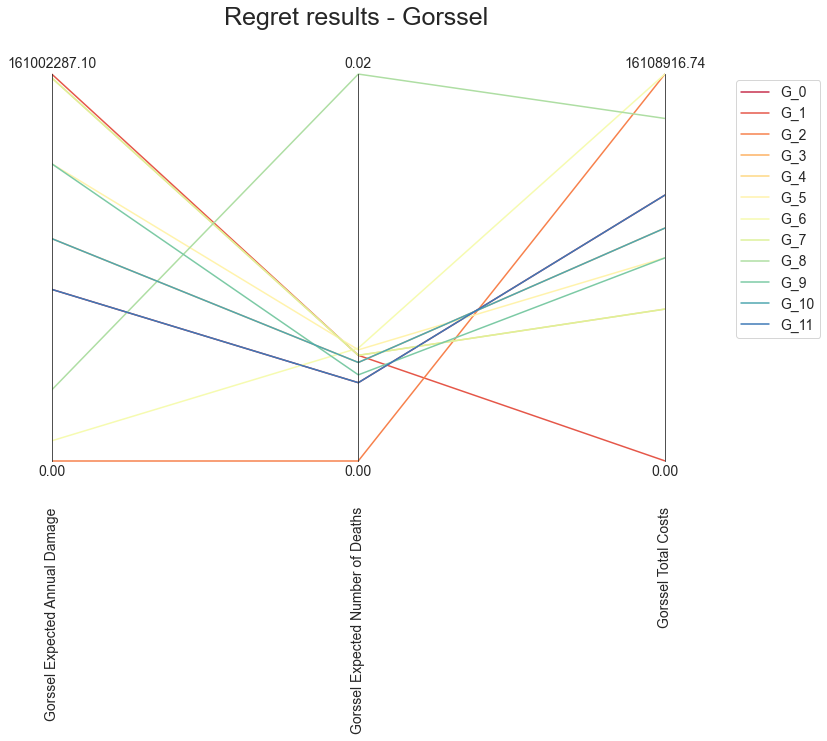

In [20]:
from matplotlib import cm

limits = parcoords.get_limits(maxregret)
paraxes = parcoords.ParallelAxes(maxregret)


for index, row in maxregret.iterrows():
    paraxes.plot(row, color=dict_colours[index], label=dict_naming[index])
    
paraxes.legend()
plt.figtext(.5,1,'Regret results - Gorssel',fontsize=25,ha='center')

plt.savefig("../../report/figures/results/regret_figure"+ "_" + ACTORNAME+ ".png", bbox_inches="tight")
plt.show()

## Satisficing
Performance threshold
"seeks a decision alternative that meets his or her performance requirements over the range of plausible future scenarios. "

For the satisficing analysis, the domain criterion metric from the assignments and as discussed in the paper: [(Bartholomew, Kwakkel 2020)](https://repository.tudelft.nl/islandora/object/uuid%3A17668d72-4ae4-47a4-9905-ebb0e1e75128). Another option that we explored was looking over the policies and seeing if there are any policies that are within all three thresholds. 

The threshold values are found within funs_project.py and sources can be found within the acompanying report.

In [21]:
satisfycing_df = policies.copy()
satisfycing_df.drop_duplicates(inplace=True)
#satisfycing_df

In [22]:
belowtresh_df = satisfycing_df.loc[(satisfycing_df['Gorssel Expected Annual Damage'] < fp.thresholds_gorssel['Gorssel Expected Annual Damage']) & \
                    (satisfycing_df['Gorssel Expected Number of Deaths'] < fp.thresholds_gorssel['Gorssel Expected Number of Deaths']) & \
                    (satisfycing_df['Gorssel Total Costs'] < fp.thresholds_gorssel['Gorssel Total Costs']),:].copy()
belowtresh_df.sort_index(inplace=True, ascending = False)
belowtresh_df

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,scenario


From the 12 selected policies there is not one policy that falls completly within all the thresholds for Gorssel. 

### Domain-criterion analysis

In [23]:
limits_df = belowtresh_df.iloc[:, -4:-1]
colors = iter(sns.color_palette())
limits = parcoords.get_limits(limits_df)

In [24]:

overall_scores = {}
for policy in du_experiments.policy.unique():
    logical = du_experiments.policy == policy
    scores = {}
    for k, v in du_outcomes.items():
        try:
            n = np.sum(v[logical]<=fp.thresholds_gorssel[k])#check if it is below thresholds
        except KeyError:
            continue
        scores[k] = n/1000 
    overall_scores[policy] = scores
        
overall_scores = pd.DataFrame(overall_scores).T

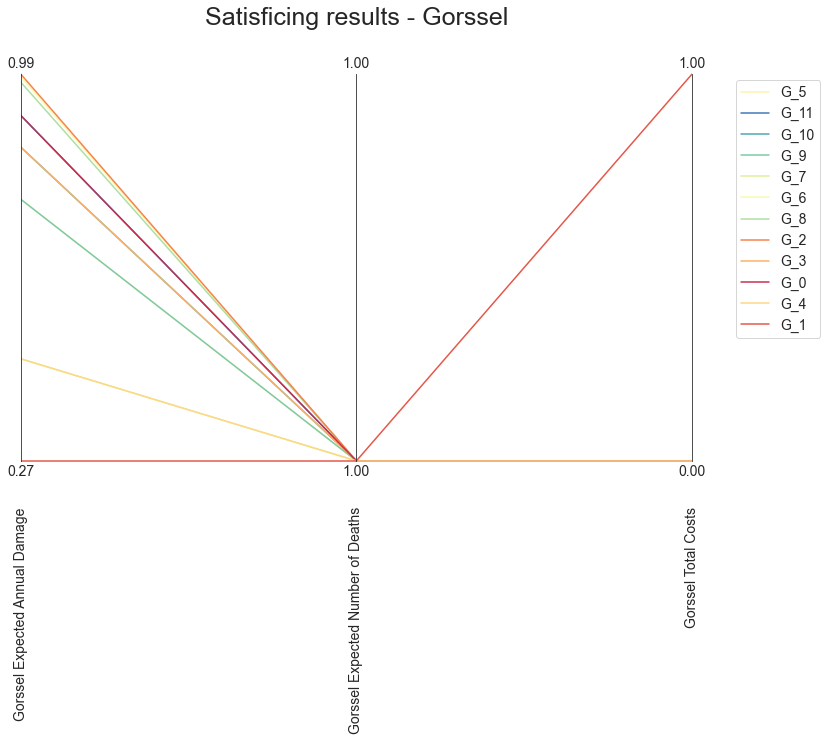

In [25]:
from matplotlib import cm

limits = parcoords.get_limits(overall_scores)
paraxes = parcoords.ParallelAxes(limits)

for index, row in overall_scores.iterrows():

    paraxes.plot(row, color=dict_colours[index], label=dict_naming[index])
    
paraxes.legend()
plt.figtext(.5,1,'Satisficing results - Gorssel',fontsize=25,ha='center')

plt.savefig("../../report/figures/results/domain_criterion"+ "_" + ACTORNAME+ ".png", bbox_inches="tight")
plt.show()

In [26]:
overall_scores

,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs
scenario high option 0,0.757,1.0,0.0
scenario worst deaths option 8,0.913,1.0,0.0
scenario worst deaths option 7,0.854,1.0,0.0
scenario worst deaths option 5,0.757,1.0,0.0
scenario worst deaths option 3,0.460,1.0,0.0
scenario worst deaths option 0,0.985,1.0,0.0
scenario worst deaths option 4,0.975,1.0,0.0
scenario absolute worst option 4,0.990,1.0,0.0
scenario absolute worst option 5,0.854,1.0,0.0
scenario absolute worst option 1,0.913,1.0,0.0


## Scoring policies
This part combines the results from both robustness measures to score the policies and select the most robust 5 policies. The regret results are normalised first to make it possible to get a 'good' average. This will be done by first taking the average of the two metrics and than sorting first by the domain-criterion and then by regret.

### Normalise the regret and take the average to score the policies


In [28]:
#Normalize the regret results
regret_scores = maxregret.copy()
regret_average = regret_scores.apply(lambda x: x/x.max(), axis=0) #minmax normalisation

In [29]:
#Get the average for each policy
regret_average['average regret'] = regret_average.mean(numeric_only=True, axis=1)
regret_average.sort_values(by='average regret', ascending = False, inplace = True) #Lower = better
regret_average

,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,average regret
policy,,,,
scenario worst deaths option 4,0.183447,1.000000,0.885327,0.689591
scenario absolute worst option 8,0.990143,0.272900,0.392379,0.551807
scenario worst deaths option 3,0.990143,0.272900,0.392379,0.551807
scenario high option 0,0.768139,0.287052,0.524766,0.526652
scenario worst deaths option 5,0.768139,0.222406,0.524766,0.505103
scenario absolute worst option 5,0.574618,0.254413,0.601853,0.476961
scenario worst deaths option 7,0.574618,0.254413,0.601853,0.476961
scenario worst deaths option 0,0.051899,0.291598,1.000000,0.447832
scenario absolute worst option 1,0.443379,0.202138,0.687121,0.444213


###  Use the satisficing / domain criterion and take their average to score the policies


In [30]:
#Get the average for each policy
satisficing_average = overall_scores.copy()
satisficing_average['average satisficing'] = satisficing_average.mean(numeric_only=True, axis=1)
satisficing_average.sort_values(by='average satisficing', ascending = True, inplace = True) #higher = better
satisficing_average

,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,average satisficing
scenario worst deaths option 3,0.460,1.0,0.0,0.486667
scenario absolute worst option 8,0.460,1.0,0.0,0.486667
scenario high option 0,0.757,1.0,0.0,0.585667
scenario worst deaths option 5,0.757,1.0,0.0,0.585667
scenario worst deaths option 7,0.854,1.0,0.0,0.618000
scenario absolute worst option 5,0.854,1.0,0.0,0.618000
scenario worst deaths option 8,0.913,1.0,0.0,0.637667
scenario absolute worst option 1,0.913,1.0,0.0,0.637667
scenario worst deaths option 4,0.975,1.0,0.0,0.658333
scenario worst deaths option 0,0.985,1.0,0.0,0.661667


### Add them together  

In [31]:
merged_df = pd.concat([satisficing_average, regret_average], join="inner", axis = 1)


In [32]:
merged_df.sort_values(by='average satisficing', inplace = True, ascending = True)
merged_df.sort_values(by='average regret', inplace = True, ascending = False)




In [33]:
#take te most robust policies and put them into a df.
robust_policies = merged_df.tail(5)
robust_policies

,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,average satisficing,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,average regret
scenario worst deaths option 0,0.985,1.0,0.0,0.661667,0.051899,0.291598,1.000000,0.447832
scenario worst deaths option 8,0.913,1.0,0.0,0.637667,0.443379,0.202138,0.687121,0.444213
scenario absolute worst option 1,0.913,1.0,0.0,0.637667,0.443379,0.202138,0.687121,0.444213
scenario absolute worst option 2,0.270,1.0,1.0,0.756667,1.000000,0.272900,0.000000,0.424300
scenario absolute worst option 4,0.990,1.0,0.0,0.663333,0.000000,0.000000,1.000000,0.333333


The policies above show that there often is a trade-off between satisficing and regret. 

## Tying it back to the policy levers.

In [34]:
#now to return to an original list of policies with this
policy_names = robust_policies.index.values.tolist()

In [35]:
temp_results = DU_policy_selected_df[DU_policy_selected_df['policy'].isin(policy_names)]

In [36]:
lever_names = policies_policy_df.columns.values.tolist()


In [37]:
robust_policies_results = temp_results[lever_names].drop_duplicates()

In [38]:
robust_policies_results

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
1000,0,0,0,1,1,1,2,5,0,0,3,4,1
5000,0,0,0,1,0,1,1,8,0,0,10,4,1
7000,0,0,0,1,1,1,3,8,0,0,2,5,3
9000,0,0,0,1,1,1,2,5,0,0,7,7,3
11000,0,0,0,1,1,1,3,0,0,0,4,3,7


In [39]:
robust_policies_results.to_csv('simulation/selected/selected_policies_' + ACTORNAME + '.csv')

In [40]:
lever_names.append('policy')
robust_policies_results_names = temp_results[lever_names].drop_duplicates()
robust_policies_results_names.set_index('policy', inplace = True)
robust_policies_results_names

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
policy,,,,,,,,,,,,,
scenario worst deaths option 8,0,0,0,1,1,1,2,5,0,0,3,4,1
scenario worst deaths option 0,0,0,0,1,0,1,1,8,0,0,10,4,1
scenario absolute worst option 4,0,0,0,1,1,1,3,8,0,0,2,5,3
scenario absolute worst option 1,0,0,0,1,1,1,2,5,0,0,7,7,3
scenario absolute worst option 2,0,0,0,1,1,1,3,0,0,0,4,3,7
